### 下載Fruits360資料集

In [1]:
import tensorflow as tf

url = 'https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip'
name = 'fruits360'
file = tf.keras.utils.get_file(name,url,extract=True)

790880256/Unknown - 29s 0us/step

In [2]:
import os

# 指定訓練資料夾目錄
training_path = os.path.sep.join(file.split(os.path.sep)[0:-1]+['Fruit-Images-Dataset-master','Training'])

# 指定測試資料夾目錄
test_path     = os.path.sep.join(file.split(os.path.sep)[0:-1]+['Fruit-Images-Dataset-master','Test'])

# 定義訓練影像資料產生器
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.1)
# 定義測試影像資料產生器
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 訓練資料產生器
train_generator = train_datagen.flow_from_directory(training_path,target_size=(100,100),batch_size=32,class_mode='sparse',subset='training')
# 驗證資料產生器
valid_generator = train_datagen.flow_from_directory(training_path,target_size=(100,100),batch_size=32,class_mode='sparse',subset='validation')
# 測試資料產生器
test_generator  = test_datagen.flow_from_directory(test_path,target_size=(100,100),batch_size=32,class_mode='sparse')

Found 60955 images belonging to 131 classes.
Found 6737 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [3]:
#類別名稱與代號
print(list(train_generator.class_indices.keys())[1])

#訓練樣本數量與類別數量
print(train_generator.n, train_generator.num_classes)

Apple Crimson Snow
60955 131


### 顯示部分訓練資料

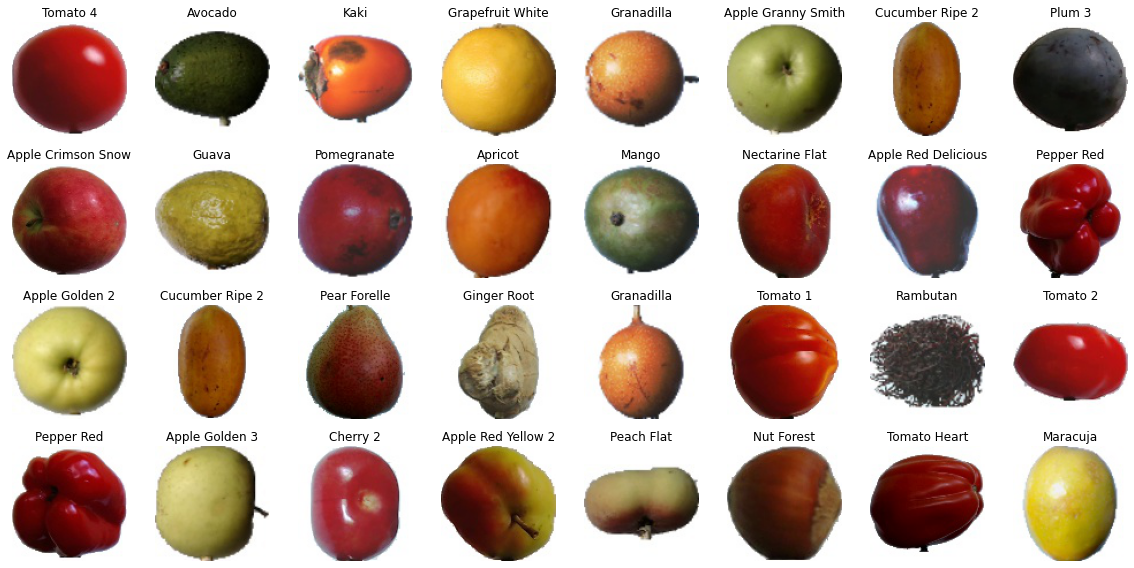

In [4]:
import matplotlib.pyplot as plt

indices_class = {v:name for name,v in train_generator.class_indices.items()}

(X,y)=train_generator.next()

plt.figure(figsize=(16,8))
for i in range(X.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()        

### 顯示部分驗證資料

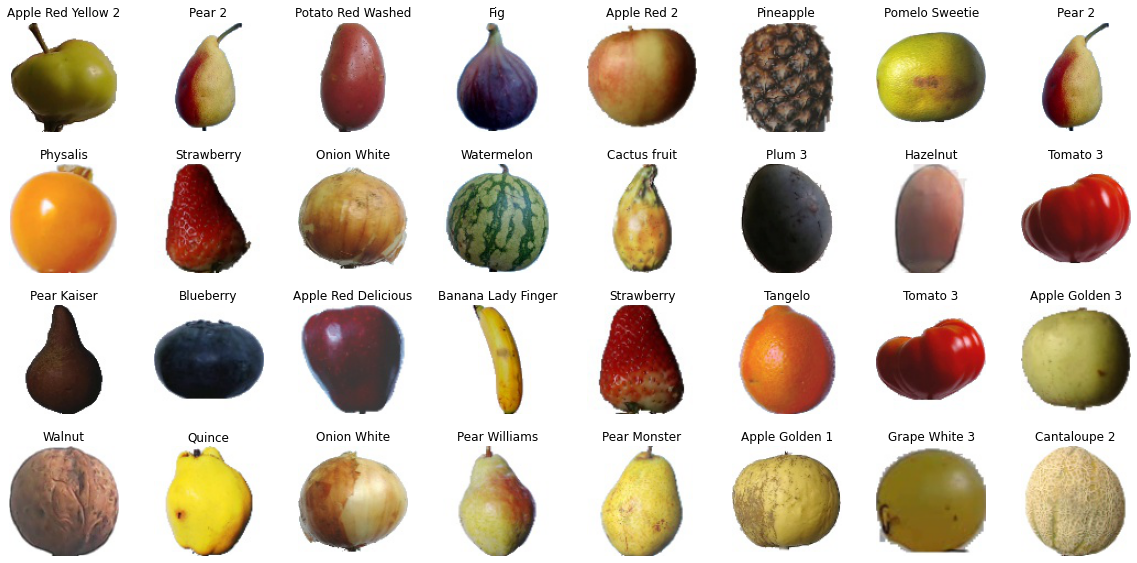

In [5]:
(X,y)=valid_generator.next()
plt.figure(figsize=(16,8))
for i in range(X.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()

### 顯示部分測試資料

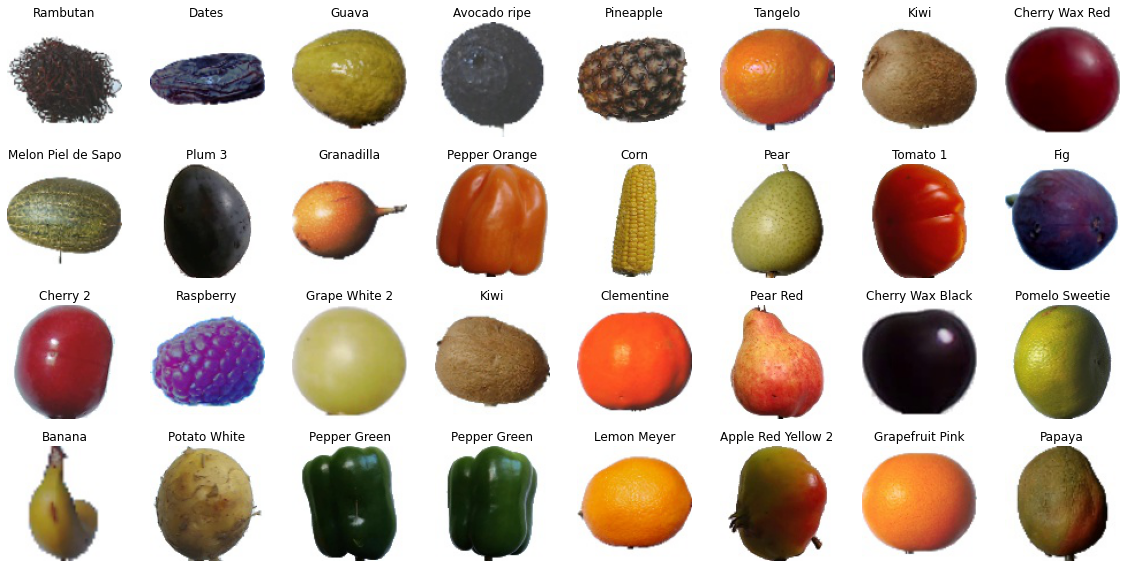

In [6]:
(X,y)=test_generator.next()
plt.figure(figsize=(16,8))
for i in range(X.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()     

### 定義卷積神經網路架構

In [7]:
def fruits360_model(c,f=16):
    model  = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((100,100,3)))
    model.add(tf.keras.layers.Conv2D(f,(3,3),padding='valid',activation='relu'))
    model.add(tf.keras.layers.Conv2D(f,(3,3),padding='valid',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3,3)))    
    model.add(tf.keras.layers.Conv2D(f*2,(3,3),padding='valid',activation='relu'))
    model.add(tf.keras.layers.Conv2D(f*2,(3,3),padding='valid',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3,3)))    
    model.add(tf.keras.layers.Conv2D(f*3,(3,3),padding='valid',activation='relu'))
    model.add(tf.keras.layers.Conv2D(f*3,(3,3),padding='valid',activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(c,activation='relu'))
    model.add(tf.keras.layers.Dense(c,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = fruits360_model(train_generator.num_classes,10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 10)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 10)        910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 20)        1820      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 20)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 30)          5

### 訓練卷積神經網路

In [ ]:
history = model.fit(train_generator,epochs=10,validation_data=valid_generator)

Epoch 1/10
1275/1905 [===================>..........] - ETA: 13s - loss: 2.7743 - accuracy: 0.3240

### 顯示訓練損失歷史曲線

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 顯示部分測試結果

In [ ]:
import numpy as np
(X,y)=test_generator.next()
py   = model.predict(X)
plt.figure(figsize=(16,32))
for i in range(X.shape[0]):
    plt.subplot(8,4,i+1)
    plt.imshow(X[i])
    plt.title(indices_class[np.argmax(py[i])]+'/'+indices_class[int(y[i])])
    plt.axis(False)
plt.tight_layout()    
plt.show()   